In [15]:
import matplotlib.pyplot as plt

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [33]:
df = pd.read_csv(r"C:\Users\Deena Johnson\Documents\`Data Files\companies.csv")
df.head()

,company_name,url,city,state,country,employees,founded,Industry,estimated_revenues,job_openings,keywords,LeadInvestors,Accelerator,btype,valuation,total_funding,growth_percentage
0,OpenAI,openai.com,San Francisco,CA,United States,655,2015.0,AI,88722200.0,25.0,"Artificial Intelligence, Online Gaming, Non Pr...","Thrive, Founders Fund",NaN,NaN,2.900000e+10,11000000000.0,1.18
1,Alchemy,alchemy.com,San Francisco,CA,United States,201,NaN,Fintech,39269750.0,1.0,NaN,"Lightspeed, Silver Lake",NaN,NaN,1.020000e+10,564000000.0,1.34
2,dbt Labs,getdbt.com,Philadelphia,PA,United States,511,2016.0,Analytics,76987400.0,1.0,NaN,Altimeter,NaN,NaN,4.200000e+09,414400000.0,0.76
3,Kindbody,kindbody.com,New York,NY,United States,621,2018.0,Digital Health,105791000.0,38.0,"Healthcare, Medical, Women-Focused, Corporate ...",NaN,NaN,NaN,1.800000e+09,125300000.0,0.44
4,Anthropic,anthropic.com,San Francisco,CA,USA,131,NaN,AI,15400000.0,1.0,NaN,NaN,NaN,NaN,4.400000e+09,1300000000.0,1.38


In [23]:
#  1 - count of how many of the companies in the data set are from each state
# df[df['state']].groupby(['state','company_name']).count('company_name')
df[df['state']].groupby(['company_name']).count()

KeyError: "None of [Index(['CA', 'CA', 'PA', 'NY', 'CA', 'CA', 'NY', 'CA', 'UK', 'CA',\n       ...\n       'CA', 'MA', 'CA', 'CA', 'CA', 'CA', 'NC', 'NY', 'CO', 'CA'],\n      dtype='object', length=498)] are in the [columns]"

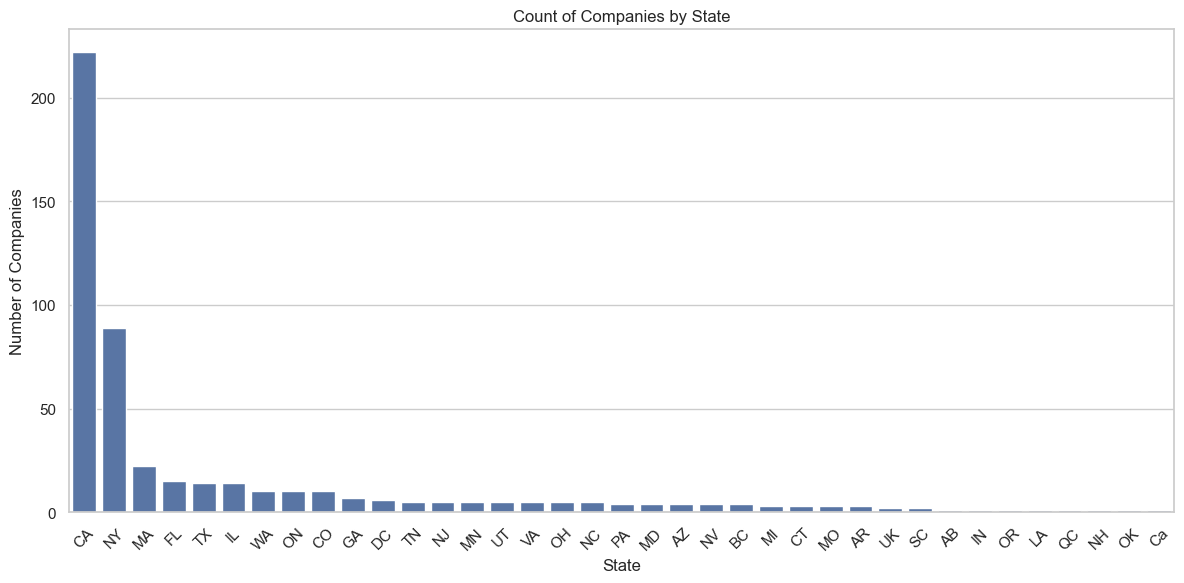

In [18]:
# Set the plot style
sns.set(style="whitegrid")

# Create a countplot for the 'state' column
plt.figure(figsize=(12, 6))  # Adjust figure size as needed
sns.countplot(data=df, x='state', order=df['state'].value_counts().index)

# Set plot labels and title
plt.xlabel('State')
plt.ylabel('Number of Companies')
plt.title('Count of Companies by State')

# Rotate x-axis labels for better readability, if necessary
plt.xticks(rotation=45)

# Display the plot
plt.tight_layout()
plt.show()

In [26]:
# 3  a sum of how many total job openings there are in each industry
df[df['Industry']].groupby(['job_openings']).sum()


KeyError: "None of [Index(['AI', 'Fintech', 'Analytics', 'Digital Health', 'AI', 'Analytics',\n       'IT Security', 'IT Security', 'Fintech', 'Fintech',\n       ...\n       'Finance', 'Tech Services', 'Tech Services', 'Fintech',\n       'Digital Health', 'Tech Services', 'Environmental', 'Analytics',\n       'Analytics', 'Tech Services'],\n      dtype='object', length=498)] are in the [columns]"

C:\Users\Deena Johnson\AppData\Local\Temp\ipykernel_3436\174682011.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=industry_openings, x='Industry', y='job_openings', palette='viridis')


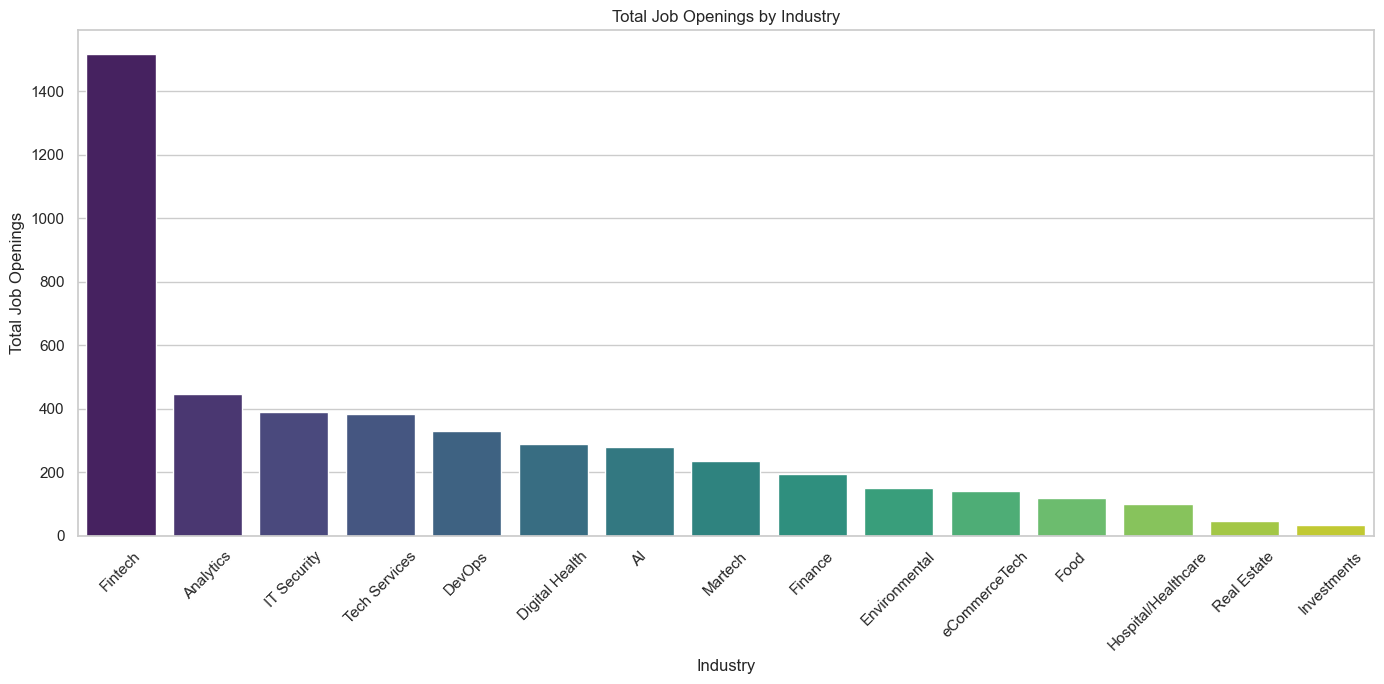

In [28]:
# Group by 'industry' and sum the 'job_openings'
industry_openings = df.groupby('Industry')['job_openings'].sum().reset_index()

# Sort by the total number of job openings in descending order
industry_openings = industry_openings.sort_values(by='job_openings', ascending=False)

# Set the plot style
sns.set(style="whitegrid")

# Create a bar plot
plt.figure(figsize=(14, 7))  # Adjust figure size as needed
sns.barplot(data=industry_openings, x='Industry', y='job_openings', palette='viridis')

# Set plot labels and title
plt.xlabel('Industry')
plt.ylabel('Total Job Openings')
plt.title('Total Job Openings by Industry')

# Rotate x-axis labels for better readability if necessary
plt.xticks(rotation=45)

# Display the plot
plt.tight_layout()
plt.show()

In [34]:
#  line chart that shows the average growth rate for each founded year
df[df['founded']].groupby(['growth_percentage']).mean()

KeyError: "None of [Index([2015.0,    nan, 2016.0, 2018.0,    nan, 2011.0, 2017.0, 2020.0, 2018.0,\n       2019.0,\n       ...\n       2019.0,    nan, 2011.0, 2018.0, 2013.0, 2016.0,    nan, 2011.0, 2014.0,\n       2020.0],\n      dtype='float64', length=498)] are in the [columns]"

In [35]:
# Group by 'founded' and mean the 'growth_percentage'
df.groupby('founded')['growth_percentage'].mean()

# Set the plot style
sns.set(style="whitegrid")

# Create a bar plot
plt.figure(figsize=(14, 7))  # Adjust figure size as needed
sns.barplot(data=industry_openings, x='founded', y='growth_percentage', palette='viridis')

# Set plot labels and title
plt.xlabel('Founded Year')
plt.ylabel('Average Growth')
plt.title('Average Growth by Year')

# Rotate x-axis labels for better readability if necessary
plt.xticks(rotation=45)

# Display the plot
plt.tight_layout()
plt.show()

ValueError: Could not interpret value `founded` for `x`. An entry with this name does not appear in `data`.

<Figure size 1400x700 with 0 Axes>

Correlation matrix:
                    employees  estimated_revenues
employees            1.000000            0.378215
estimated_revenues   0.378215            1.000000


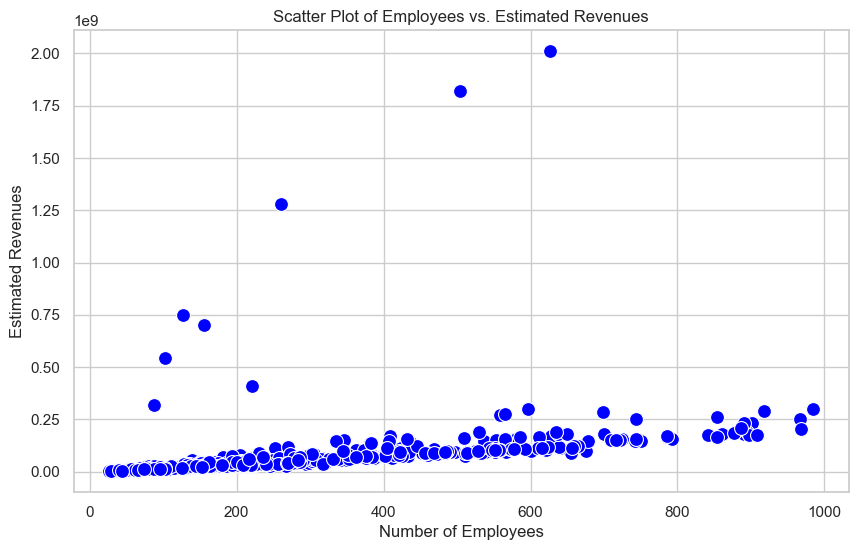

In [50]:
#  7 scatter plot that compares the number of employees to estimated revenues for each company
# correlation = df[['employees','estimated_revenues']].corr()

# Calculate the correlation between 'employees' and 'estimated_revenues'
correlation = df[['employees', 'estimated_revenues']].corr()

# Print the correlation matrix
print("Correlation matrix:")
print(correlation)

# Create a scatter plot using Seaborn
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='employees', y='estimated_revenues', color='blue', s=100)

# Add titles and labels
plt.title('Scatter Plot of Employees vs. Estimated Revenues')
plt.xlabel('Number of Employees')
plt.ylabel('Estimated Revenues')

# Display the plot
plt.show()

In [47]:
#  7 scatter plot that compares the number of employees to estimated revenues for each company
correlation = df[['employees','estimated_revenues']].corr()

In [48]:
df.head()

,company_name,url,city,state,country,employees,founded,Industry,estimated_revenues,job_openings,keywords,LeadInvestors,Accelerator,btype,valuation,total_funding,growth_percentage
0,OpenAI,openai.com,San Francisco,CA,United States,655,2015.0,AI,88722200.0,25.0,"Artificial Intelligence, Online Gaming, Non Pr...","Thrive, Founders Fund",NaN,NaN,2.900000e+10,11000000000.0,1.18
1,Alchemy,alchemy.com,San Francisco,CA,United States,201,NaN,Fintech,39269750.0,1.0,NaN,"Lightspeed, Silver Lake",NaN,NaN,1.020000e+10,564000000.0,1.34
2,dbt Labs,getdbt.com,Philadelphia,PA,United States,511,2016.0,Analytics,76987400.0,1.0,NaN,Altimeter,NaN,NaN,4.200000e+09,414400000.0,0.76
3,Kindbody,kindbody.com,New York,NY,United States,621,2018.0,Digital Health,105791000.0,38.0,"Healthcare, Medical, Women-Focused, Corporate ...",NaN,NaN,NaN,1.800000e+09,125300000.0,0.44
4,Anthropic,anthropic.com,San Francisco,CA,USA,131,NaN,AI,15400000.0,1.0,NaN,NaN,NaN,NaN,4.400000e+09,1300000000.0,1.38


498


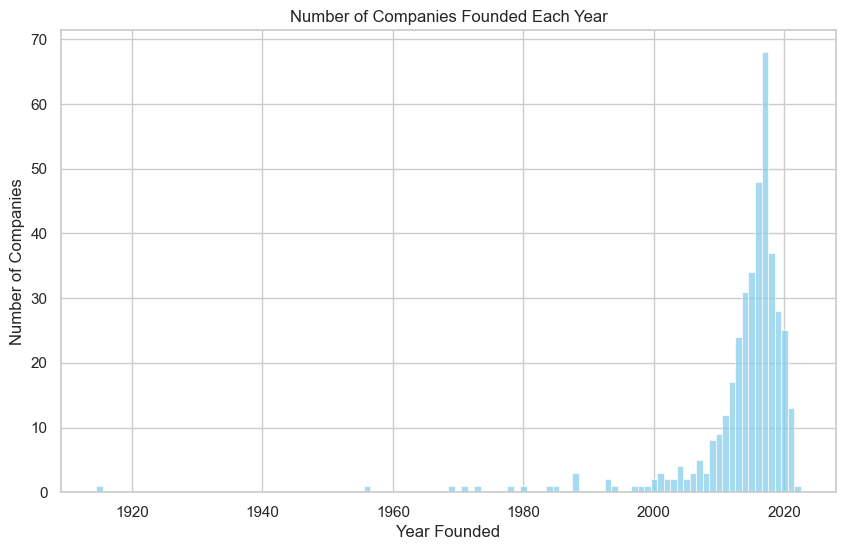

In [49]:
# 9 # Count the number of companies founded in each year

count_companies = df['company_name'].count()

# Display the count of companies founded each year
print(count_companies)

# Create a histogram using Seaborn
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='founded', bins=len(df['founded'].unique()), discrete=True, color='skyblue')

# Add titles and labels
plt.title('Number of Companies Founded Each Year')
plt.xlabel('Year Founded')
plt.ylabel('Number of Companies')

# Display the plot
plt.show()